In [29]:
import pyodbc

server = 'localhost,1433'
database = 'master'  # Replace 'master' with your database name
username = 'sa'
password = 'Password1234'
driver = '{ODBC Driver 17 for SQL Server}'  # Ensure this driver is installed

try:
    conn = pyodbc.connect(
        f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')
    cursor = conn.cursor()
    
    # Execute a test query
    cursor.execute("SELECT Name FROM sys.Databases")
    for row in cursor.fetchall():
        print(row)
    conn.close()

except Exception as e:
    print(f"Error: {e}")



('master',)
('tempdb',)
('model',)
('msdb',)
('FinanceDB',)
('Finance',)
('Finance_DB',)
('FinanceDB2',)


Connection Successful!
Connection Closed!


/tmp/ipykernel_518355/2288352432.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes[view] = pd.read_sql(query, conn)


EmployeeID: 0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
Name: EmployeeID, dtype: int64
EmployeeName: 0    Alice Johnson
1        Bob Smith
2    Charlie Davis
3    Diana Roberts
4      Evan Wilson
5            Linus
6       Arch Linux
7     Garuda Linux
Name: EmployeeName, dtype: object
TotalIncomeCount: 0    2
1    2
2    2
3    1
4    1
5    0
6    0
7    0
Name: TotalIncomeCount, dtype: int64
TotalIncomeAmount: 0    63000.0
1    31500.0
2     1000.0
3     7500.0
4     1000.0
5        0.0
6        0.0
7        0.0
Name: TotalIncomeAmount, dtype: float64
TotalExpenseCount: 0    2
1    1
2    2
3    1
4    1
5    0
6    0
7    0
Name: TotalExpenseCount, dtype: int64
TotalExpenseAmount: 0    51200.50
1      500.00
2    13500.75
3      800.00
4      200.00
5        0.00
6        0.00
7        0.00
Name: TotalExpenseAmount, dtype: float64


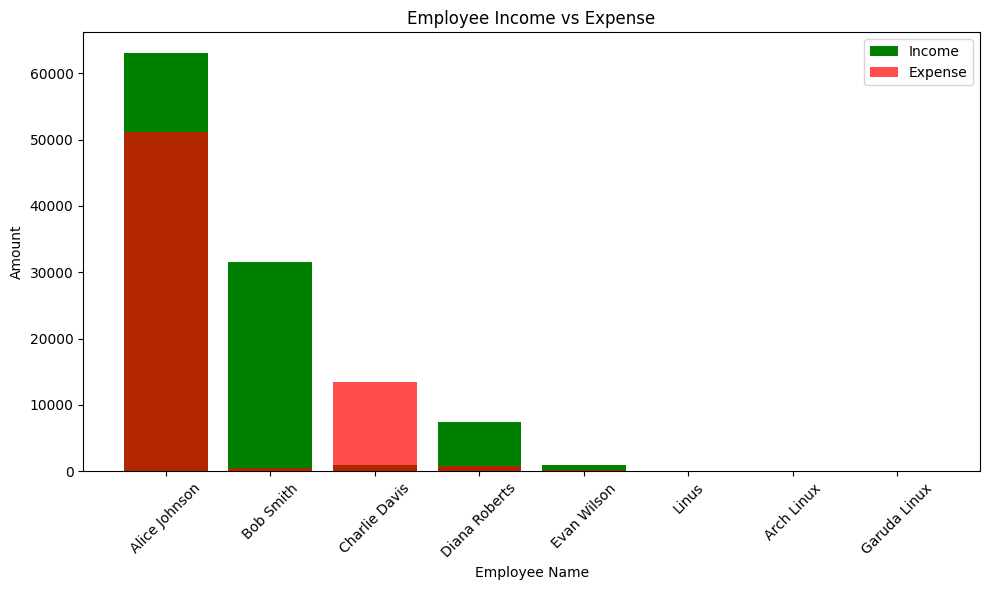

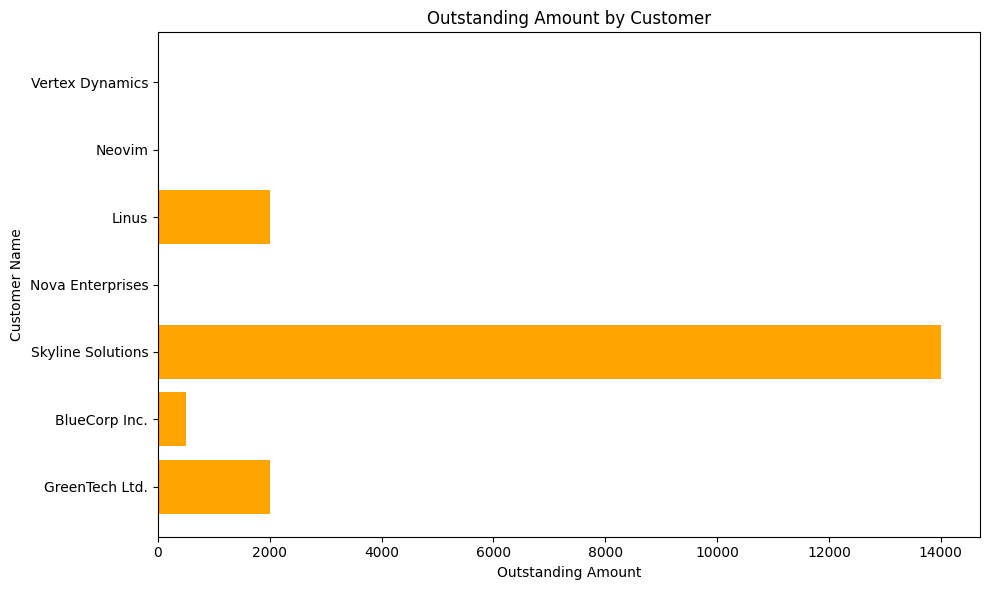

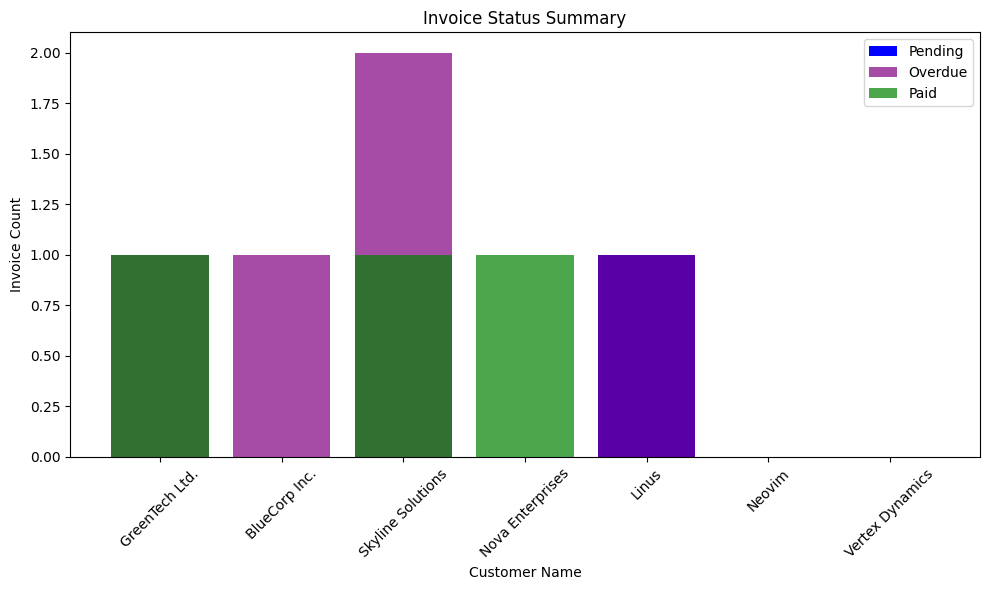

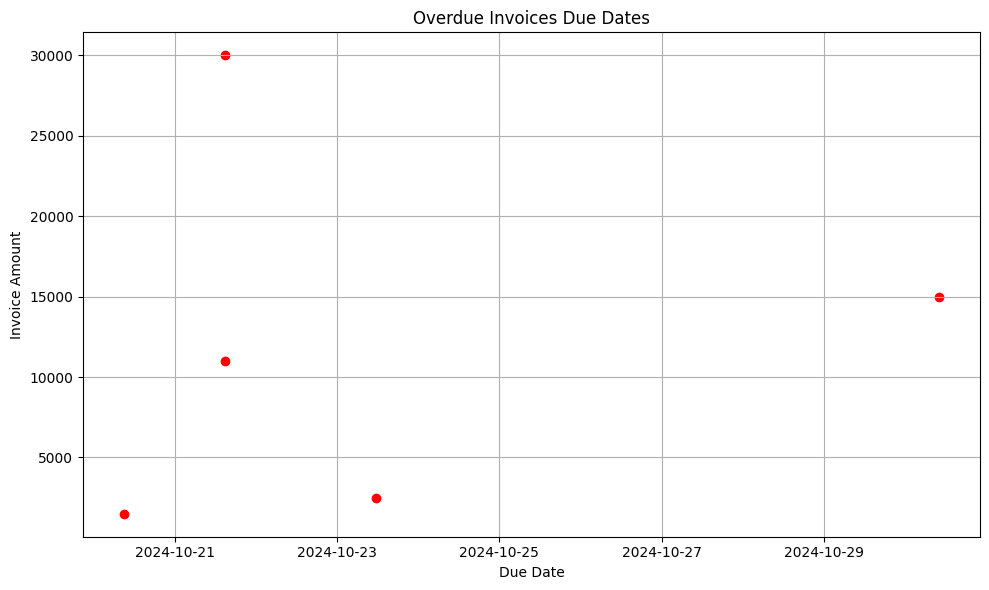

In [30]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# Database Connection Configuration
server = 'localhost,1433'
database = 'FinanceDB2'  # Replace with your database name
username = 'sa'
password = 'Password1234'
driver = '{ODBC Driver 17 for SQL Server}'

# Connect to SQL Server
try:
    conn = pyodbc.connect(
        f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')
    print("Connection Successful!")
    
    # Read Data from Views
    query_views = {
        "Employee Stats": "SELECT * FROM TotalRecordsByEmployee",
        "Customer Overview": "SELECT * FROM CustomerFinancialOverview",
        "Invoice Summary": "SELECT * FROM CustomerInvoiceStatusSummary",
        "Pending Invoices": "SELECT * FROM PendingInvoices",
        "Overdue Invoices": "SELECT * FROM OverdueInvoices",
        "Payments": "SELECT * FROM PaymentDetailsByInvoice"
    }

    # Store data in a dictionary
    dataframes = {}
    for view, query in query_views.items():
        dataframes[view] = pd.read_sql(query, conn)
    
    # Close Connection
    conn.close()
    print("Connection Closed!")

    # **1. Employee Statistics - Income vs Expense**
    emp_stats = dataframes['Employee Stats']
    plt.figure(figsize=(10, 6))

    for i in emp_stats:
        print(f'{i}: {emp_stats[i]}')

    plt.bar(emp_stats['EmployeeName'], emp_stats['TotalIncomeAmount'], label='Income', color='green')
    plt.bar(emp_stats['EmployeeName'], emp_stats['TotalExpenseAmount'], label='Expense', color='red', alpha=0.7)
    plt.title('Employee Income vs Expense')
    plt.xlabel('Employee Name')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # **2. Customer Financial Overview - Outstanding Amounts**
    customer_overview = dataframes['Customer Overview']
    plt.figure(figsize=(10, 6))
    plt.barh(customer_overview['CustomerName'], customer_overview['OutstandingAmount'], color='orange')
    plt.title('Outstanding Amount by Customer')
    plt.xlabel('Outstanding Amount')
    plt.ylabel('Customer Name')
    plt.tight_layout()
    plt.show()

    # **3. Invoice Status Summary - Distribution**
    invoice_summary = dataframes['Invoice Summary']
    plt.figure(figsize=(10, 6))
    plt.bar(invoice_summary['CustomerName'], invoice_summary['PendingInvoices'], label='Pending', color='blue')
    plt.bar(invoice_summary['CustomerName'], invoice_summary['OverdueInvoices'], label='Overdue', color='purple', alpha=0.7)
    plt.bar(invoice_summary['CustomerName'], invoice_summary['PaidInvoices'], label='Paid', color='green', alpha=0.7)
    plt.title('Invoice Status Summary')
    plt.xlabel('Customer Name')
    plt.ylabel('Invoice Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # **4. Overdue Invoices - Due Dates**
    pending_invoices = dataframes['Overdue Invoices']
    plt.figure(figsize=(10, 6))
    plt.scatter(pending_invoices['DueDate'], pending_invoices['InvoiceAmount'], color='red', marker='o')
    plt.title('Overdue Invoices Due Dates')
    plt.xlabel('Due Date')
    plt.ylabel('Invoice Amount')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")

Connection Successful!
Data Loaded Successfully!


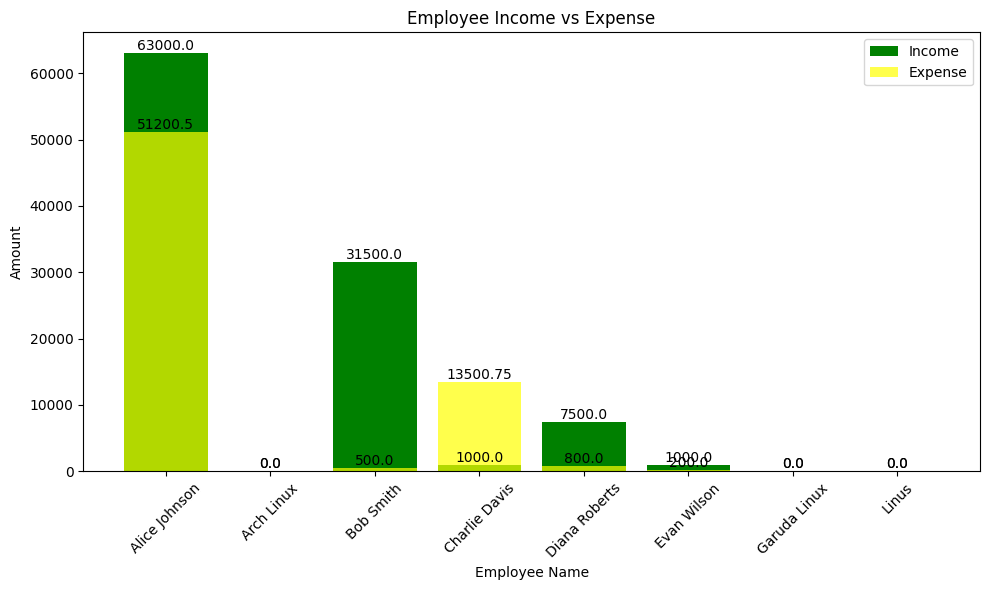

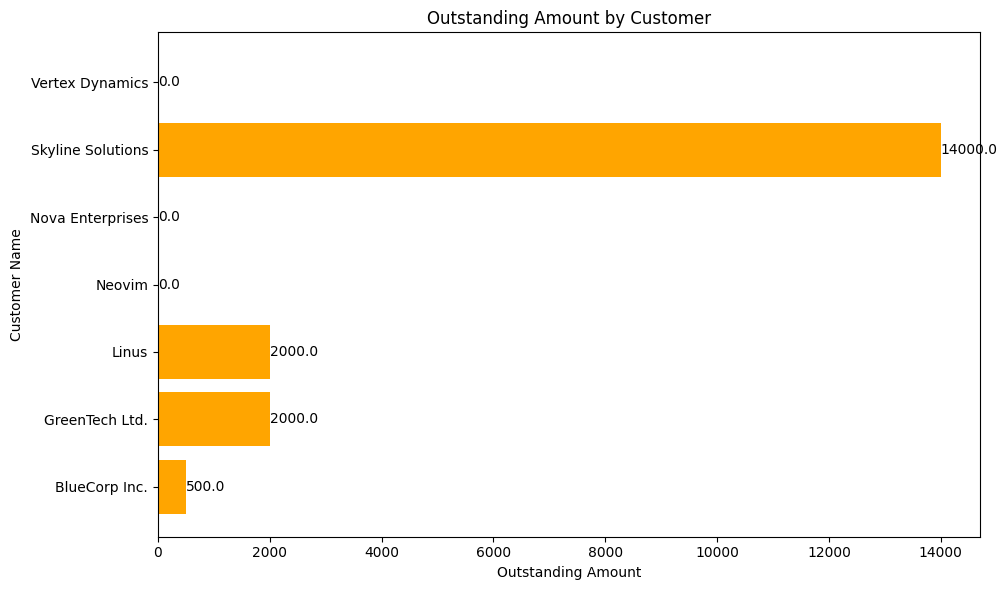

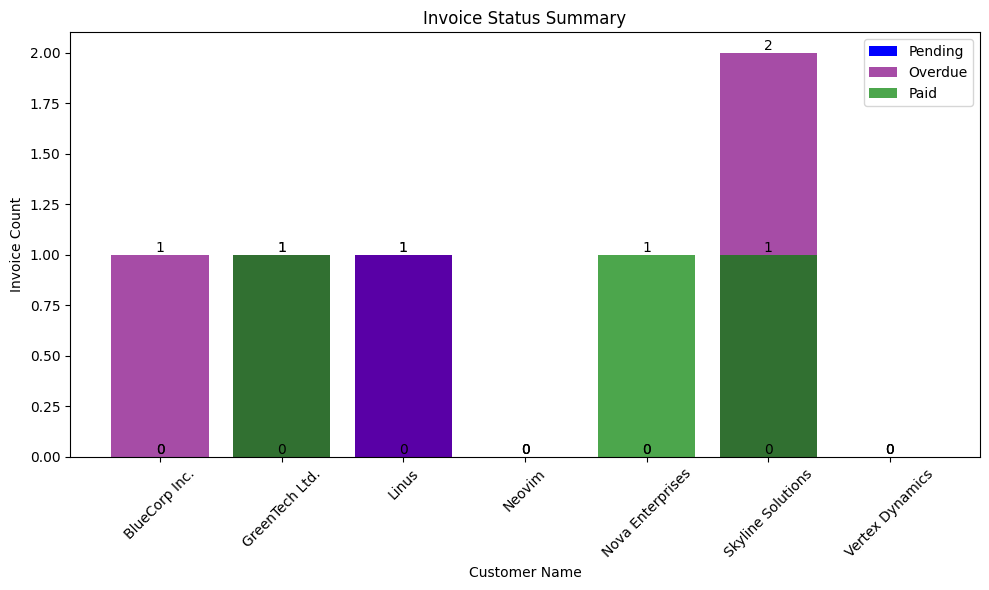

In [31]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Database Connection Configuration
server = 'localhost,1433'
database = 'FinanceDB2'  # Replace with your actual database name
username = 'sa'
password = 'Password1234'

# Create the connection string for SQLAlchemy
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Connect using SQLAlchemy
engine = create_engine(connection_string)
print("Connection Successful!")

# Read Data from Views
query_views = {
    "Employee Stats": "SELECT * FROM TotalRecordsByEmployee",
    "Customer Overview": "SELECT * FROM CustomerFinancialOverview",
    "Invoice Summary": "SELECT * FROM CustomerInvoiceStatusSummary",
    "Pending Invoices": "SELECT * FROM PendingInvoices",
    "Overdue Invoices": "SELECT * FROM OverdueInvoices",
    "Payments": "SELECT * FROM PaymentDetailsByInvoice"
}

# Store data in a dictionary
dataframes = {}
for view, query in query_views.items():
    dataframes[view] = pd.read_sql(query, engine)

print("Data Loaded Successfully!")
# **1. Employee Statistics - Income vs Expense**
emp_stats = dataframes['Employee Stats'].sort_values(by='EmployeeName', ascending=True)
plt.figure(figsize=(10, 6))
bar1 = plt.bar(emp_stats['EmployeeName'], emp_stats['TotalIncomeAmount'], label='Income', color='green')
bar2 = plt.bar(emp_stats['EmployeeName'], emp_stats['TotalExpenseAmount'], label='Expense', color='yellow', alpha=0.7)
plt.title('Employee Income vs Expense')
plt.xlabel('Employee Name')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Adding data labels
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# **2. Customer Financial Overview - Outstanding Amounts**
customer_overview = dataframes['Customer Overview'].sort_values(by='CustomerName', ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(customer_overview['CustomerName'], customer_overview['OutstandingAmount'], color='orange')
plt.title('Outstanding Amount by Customer')
plt.xlabel('Outstanding Amount')
plt.ylabel('Customer Name')
plt.tight_layout()

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(), 2), va='center')

plt.show()

# **3. Invoice Status Summary - Distribution**
invoice_summary = dataframes['Invoice Summary'].sort_values(by='CustomerName', ascending=True)
plt.figure(figsize=(10, 6))
bar_pending = plt.bar(invoice_summary['CustomerName'], invoice_summary['PendingInvoices'], label='Pending', color='blue')
bar_overdue = plt.bar(invoice_summary['CustomerName'], invoice_summary['OverdueInvoices'], label='Overdue', color='purple', alpha=0.7)
bar_paid = plt.bar(invoice_summary['CustomerName'], invoice_summary['PaidInvoices'], label='Paid', color='green', alpha=0.7)
plt.title('Invoice Status Summary')
plt.xlabel('Customer Name')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Adding data labels
for bar in bar_pending:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar_overdue:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar_paid:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()
